## <strong><em><snap style=color:yellow> Analise de Series Temporais com Python

##### Problema de Negocio:
##### Usando dados historicos das vendas ao longo de 2023 seria possivel prever o total de vendas em jan/2024?

<img src="https://i0.wp.com/blog.dsacademy.com.br/wp-content/uploads/2023/09/Analise-e-Modelagem-de-Series-Temporais.png?fit=1456%2C816&ssl=1">

<strong><em><snap style=color:yellow> Frameworks

In [6]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

<strong><em><snap style=color:yellow> Analise Exploratória

In [7]:
df = pd.read_csv(r"dataset.csv")

In [8]:
df.shape

(365, 2)

In [9]:
df.sample(3)

,Data,Total_Vendas
282,2023-10-10,81.779363
181,2023-07-01,46.945897
138,2023-05-19,51.218307


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
df['Data'] = pd.to_datetime(df['Data'])

In [12]:
df.dtypes

Data            datetime64[ns]
Total_Vendas           float64
dtype: object

In [13]:
df.head(3)

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722


In [14]:
df.rename(columns={'Total_Vendas':'Vendas'}, inplace=True)

In [15]:
df.isna().sum()

Data      0
Vendas    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df['Vendas'].describe()

count    365.000000
mean      59.152472
std       10.056436
min       33.265284
25%       51.496725
50%       59.165362
75%       66.610772
max       84.430251
Name: Vendas, dtype: float64

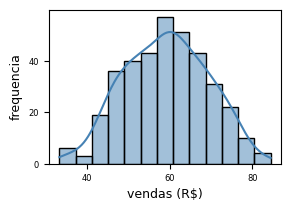

In [18]:
plt.figure(figsize=(3,2))
sns.histplot(data=df, x='Vendas', kde=True, color='steelblue')
plt.ylabel('frequencia', size=9)
plt.xlabel('vendas (R$)', size=9)
plt.xticks(size=6)
plt.yticks(size=6)
plt.show()

In [19]:
# transformando o df em serie temporal

serie_temporal = df.set_index('Data')['Vendas']
serie_temporal = serie_temporal.asfreq('D')
print(f'type: {type(serie_temporal)}')

type: <class 'pandas.core.series.Series'>


In [20]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Vendas, Length: 365, dtype: float64

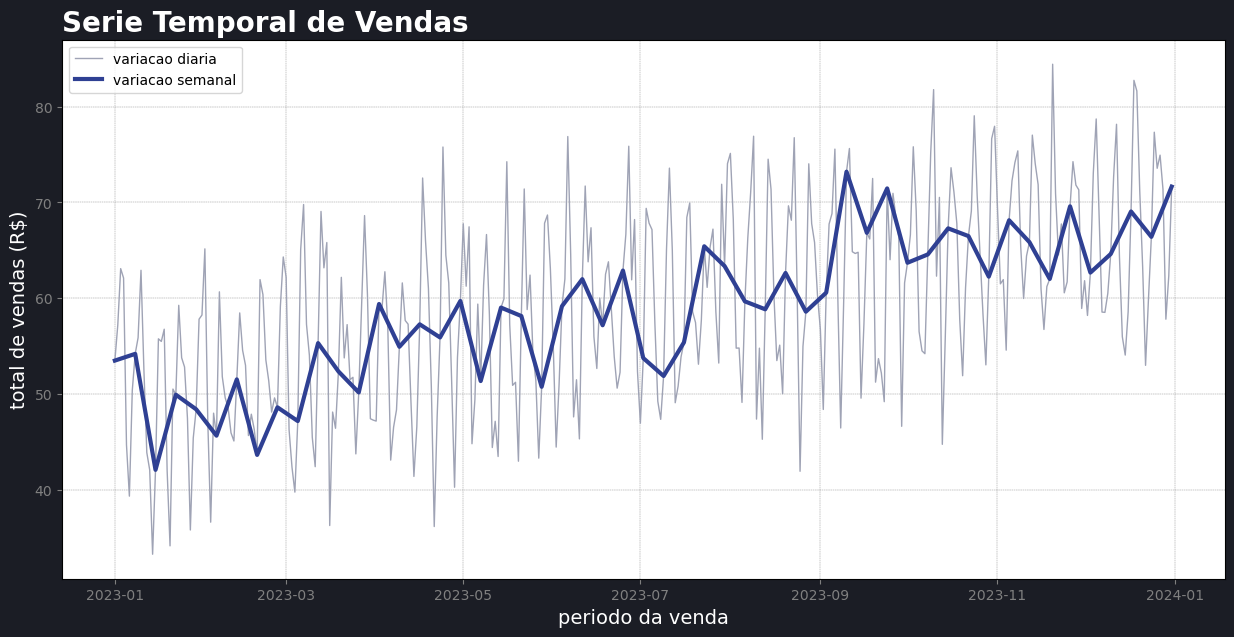

In [21]:
# visualizando graficamente
plt.figure(figsize=(15,7), facecolor='#1B1D25')
plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='--', linewidth=0.3)

plt.plot(serie_temporal.asfreq('D'), color='#9FA3B5', linewidth=1, label='variacao diaria')
plt.plot(serie_temporal.asfreq('W'), color='#2F4093', linewidth=3, label='variacao semanal')


plt.title('Serie Temporal de Vendas', loc='left', size=20, color='white', weight='bold')
plt.xlabel('periodo da venda', size=14, color='white')
plt.ylabel('total de vendas (R$)', size=14, color='white')
plt.tick_params('y', colors='grey')
plt.tick_params('x', colors='gray')
plt.legend(loc='best')

plt.show()

#### <strong><em><snap style=color:yellow>Suavizacao Exponencial

A suavizacao exponencial eh uma tecnica de analise e previsao de series temporais que aplica medias ponderadas aos dados historicos, onde os pesos diminuem exponencialmente a medida que os dados ficam mais antigos. A suavizacao exponencial eh util para lidar com tendencias e sazonalidades nos dados, e para reduzir o ruido.

In [22]:
# cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

A linha acima cria uma instancia da classe SimpleExpSmoothing, utilizando a coluna 'Vendas' da serie 'serie_temporal' como entrada

In [23]:
# treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level=0.2)

A linha acima faz uma chamada ao metodo fit() para ajustar o modelo de suavizacao exponencial aos dados. O argumento smoothing_level=02 define o parametro da suavizacao (alfa) como 0.2. O parametro de suavizacao controla a rapidez com que os pesos decrescem ao longo do tempo; um valor maior atribui mais peso aos dados mais recentes, enquanto um valor menor atribui menos peso aos dados mais antigos. O valor de alfa deve estar entre 0 e 1.

In [24]:
# extrair as previsoes do modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

In [25]:
suavizacao_exponencial

Data
2023-01-01    53.992091
2023-01-02    53.890387
2023-01-03    54.547708
2023-01-04    56.255711
2023-01-05    57.425366
                ...    
2023-12-27    68.660021
2023-12-28    69.915131
2023-12-29    70.207076
2023-12-30    67.727045
2023-12-31    66.649685
Freq: D, Length: 365, dtype: float64

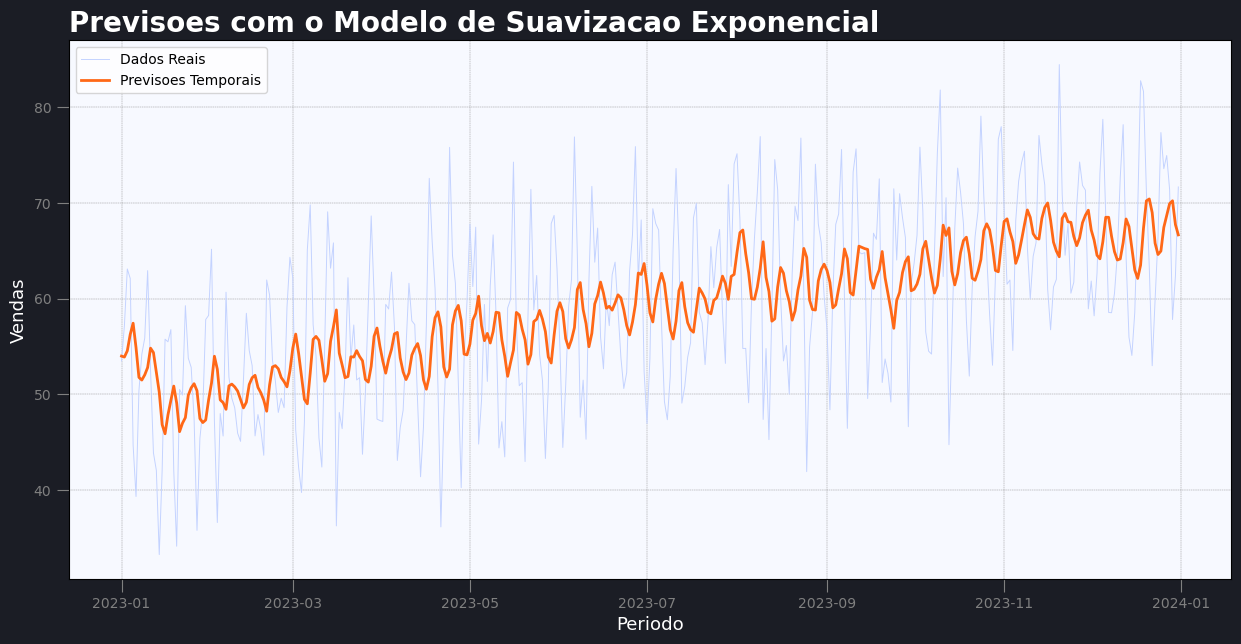

In [26]:
# visualizando graficamente as previsoes do modelo vs dados reais

plt.figure(figsize=(15,7), facecolor='#1B1D25')
plt.gca().set_facecolor('#F7F9FF')
plt.grid(color='grey', linestyle='--', linewidth=0.3)

plt.title('Previsoes com o Modelo de Suavizacao Exponencial', size=20, loc='left', color='white', weight='bold')

plt.plot(serie_temporal, color='#C4D3FF', linewidth=0.7, label='Dados Reais')
plt.plot(suavizacao_exponencial, color='#FF6817', linestyle='-', linewidth=2, label='Previsoes Temporais')

plt.legend(loc='best')
plt.xlabel('Periodo', size=13, color='white')
plt.ylabel('Vendas', size=13, color='white')
plt.tick_params(colors='grey', size=9)

plt.show()

#### Deploy e Previsao com o Modelo Treinado

In [43]:
# numero e previsoes
num_previsoes = 90

In [53]:
# previsoes com o modelo
previsoes = modelo_ajustado.forecast(steps=num_previsoes)
print('Previsao para o total de vendas:\n', round(previsoes.head(), 2), sep='')

Previsao para o total de vendas:
2024-01-01    67.65
2024-01-02    67.65
2024-01-03    67.65
2024-01-04    67.65
2024-01-05    67.65
Freq: D, dtype: float64
